# ÂØπÊØîÊÄßÊµãËØï

## ÂØºÂÖ•

In [1]:
if !isdefined(Main, :JuNarsese)
    push!(LOAD_PATH, "../src") # Áî®‰∫éÁõ¥Êé•ÊâìÂºÄÔºà..‰∏ä‰∏ÄÁ∫ßÁõÆÂΩïÔºâ
    push!(LOAD_PATH, "../../JuNarsese/") # Áî®‰∫éÁõ¥Êé•ÊâìÂºÄÔºà..‰∏ä‰∏ÄÁ∫ßÁõÆÂΩïÔºâ
    push!(LOAD_PATH, "src") # Áî®‰∫éVSCodeË∞ÉËØïÔºàÈ°πÁõÆÊ†πÁõÆÂΩïËµ∑Ôºâ
    push!(LOAD_PATH, "../JuNarsese/") # Áî®‰∫éVSCodeË∞ÉËØïÔºàÈ°πÁõÆÊ†πÁõÆÂΩïËµ∑Ôºâ

    # Ëá™Âä®ÂØºÂÖ•JuNarseseÊ®°Âùó
    using JuNarsese
    using JuNarseseParsers
end

JuNarsese v1.3.4


JuNarsese v1.3.4


In [2]:
const UNothing{T} = Union{Nothing, T} where T
const UMissing{T} = Union{Missing, T} where T
UNothing{Int}, UMissing{Exception}

(Union{Nothing, Int64}, Union{Missing, Exception})

## ÊµãËØïÈõÜÁîüÊàê

ÂÆè„ÅÆËæÖÂä©ÔºöËá™Âä®ÁîüÊàêif-elseif-elseË°®ËææÂºè

In [3]:
"""
Ëá™Âä®ÁîüÊàêif-elseif-elseË°®ËææÂºè
‰ΩøÂæóÂÖ∂‰∏≠ÁöÑË°®ËææÂºèÂè™ÊúâÂú®ËøêË°åÂà∞Êó∂Êâç‰ºöËÆ°ÁÆó

ÂèÇÊï∞Ôºö
- ÂÖÉÁªÑÔºö(Êù°‰ª∂, ÂÜÖÂÆπ)
"""
function generate_ifelseif_expressions(exprs::Vararg{Pair})
    return generate_ifelseif_expressions(nothing, exprs...)
end

"+ÈªòËÆ§ÊÉÖÂÜµ"
function generate_ifelseif_expressions(default, exprs::Vararg{Pair})
    blk::Expr = Expr(:block)
    return generate_ifelseif_expressions!(blk, default, exprs...)
end

"""
Âü∫‰∫éÂ∑≤ÊúâÁöÑ:blockË°®ËææÂºèÔºåÈôÑÂ∏¶ÈªòËÆ§ÊÉÖÂÜµ
"""
function generate_ifelseif_expressions!(parent::Expr, default, exprs::Vararg{Pair})

    current_args::Vector = parent.args
    is_first::Bool = true
    for expr_pair::Pair in exprs
        push!(
            current_args, 
            Expr(
                is_first ? begin
                    is_first = false
                    :if
                end : :elseif,
                expr_pair.first, 
                expr_pair.second
            )
        )
        current_args = current_args[end].args # Ë∑≥Âà∞if/elseifË°®ËææÂºèÁöÑÊú´Â∞æ
    end

    # ÈªòËÆ§ÊÉÖÂÜµÔºöÂ¢ûÂä†else
    !isnothing(default) && push!(
        current_args, 
        default
    )

    return parent
end

"""
Âü∫‰∫éÂ∑≤ÊúâÁöÑ:blockË°®ËææÂºè
"""
function generate_ifelseif_expressions!(parent::Expr, exprs::Vararg{Pair})
    generate_ifelseif_expressions!(parent, nothing, exprs...)
end

"""
ÂÆè„ÅÆÂΩ¢Âºè
Ê≥®ÊÑèÔºö‰º†ÂÖ•ÁöÑÊØè‰∏™PairË°®ËææÂºèÈÉΩÊòØ`Expr(:call, :(=>), Ââç, Âêé)`ÁöÑÂΩ¢Âºè
"""
macro generate_ifelseif_expressions(default, exprs::Vararg{Expr})
    # Áõ¥Êé•Ëé∑ÂèñÁ¨¨‰∫å„ÄÅÁ¨¨‰∏â‰∏™ÂèÇÊï∞
    return generate_ifelseif_expressions(
        default,
        (
            expr.args[2] => expr.args[3]
            for expr in exprs
        )...
    ) |> esc
end

d = Dict(
    1 => 1, 2 => 2, 3 => 3
)

@show generate_ifelseif_expressions(0, d...)

@show r = rand(1:4)

# ÊúÄÂ§öÁù°3Áßí
@generate_ifelseif_expressions 4 (sleep(1);r==1) => 2 (sleep(1);r==2) => 3 (sleep(1);r==3) => 4

generate_ifelseif_expressions(0, d...) = quote
    if 2
        2
    elseif 3
        3
    elseif 1
        1
    else
        0
    end
end
r = rand(1:4) = 2


3

In [4]:
"""
ÂÆèÁöÑÁ≠â‰ª∑ÂáΩÊï∞
Áî®‰∫éËá™Âä®
1. ÊûÑÈÄ†ÈöèÊú∫Êï∞
2. ÁîüÊàê`if-elseif-else`Ë°®ËææÂºè
"""
function rand_macro(exprs...)::Union{Symbol, Expr}

    # È¢ÑÂÖàËÆ°ÁÆóË°®ËææÂºèÊï∞Èáè
    n = length(exprs)

    # ÂèØËÉΩÊòØÂ∞ÅË£ÖÂà∞Êï∞ÁªÑÈáåÈù¢Âéª‰∫Ü
    if n == 1
        exprs = exprs[1].args
        n = length(exprs)
    end

    # Âè™Êúâ‰∏Ä‰∏™‚áí‰ºòÂåñÔºöÁõ¥Êé•ËøîÂõû
    if n == 1
        return exprs[1] # ÂèØËÉΩÊòØSymbol
    end
    # @assert n > 1 "ÈöèÊú∫ÈÄâÊã©Ëá≥Â∞ëÈúÄË¶Å‰∏§‰∏™Â§áÈÄâÁªìÊûú"

    rand_variable::Symbol = Symbol(":rand_n:")

    # ÊûÑÈÄ†‰ª£Á†ÅÂùó
    blk::Expr = Expr(
        :block,
        :(local $rand_variable = rand(1:$n))
    )

    return generate_ifelseif_expressions!(
        blk,
        (
            :($rand_variable == $i) => expr
            for (i, expr) in enumerate(exprs)
        )...
    )
end

"""
‰∏Ä‰∏™Áî®‰∫éÈöèÊú∫ÈÄâÊã©‰ª£Á†ÅÊâßË°åÁöÑÂÆè
ÈÅøÂÖç„ÄåÂú®ÈöèÊú∫ÈÄâÊã©‰πãÂâçÔºåÈ¢ÑÂÖàËÆ°ÁÆóÂá∫ÊâÄÊúâÁöÑÂ§áÈÄâÁªìÊûú„Äç
"""
macro rand(exprs...)
    rand_macro(exprs...) |> esc
end

# ÊúÄÂ§öÁù°‰∏ÄÁßí
@rand sleep(0.5) sleep(0.75) sleep(1)

ÈöèÊú∫ËØçÈ°πÂèëÁîüÂô®

In [5]:
randstring(n) = *(rand(Char.(97:122), n)...)

randomName() = randstring(rand(1:10))

"ÈöèÊú∫‰∫ßÁîü‰∏Ä‰∏™ÂéüÂ≠êËØçÈ°π"
function randomAtom(depth = 0, width = 0)
    type = @rand [
        Word
        IVar
        DVar
        QVar
        Operator
    ]
    type(randomName())
end

"ÈöèÊú∫‰∫ßÁîü‰∏Ä‰∏™ÈôàËø∞"
function randomStatement(depth = 5, width = 2)
    return @rand [
        randomTStatement(depth - 1, width)
        randomSStatement(depth - 1, width)
    ]
end

"""
ÈöèÊú∫‰∫ßÁîü‰∏Ä‰∏™Èù¢ÂêëËØçÈ°πÁöÑÈôàËø∞
- ËøôÈáåÁöÑÈôàËø∞Âè™ËÉΩÊòØ„Äå‰∏ÄÁ≠âÂÖ¨Ê∞ëËØçÈ°π„Äç
    - ÈÄÇÈÖçOpenJunars
"""
function randomTStatement(depth = 5, width = 2)
    constructor = depth <= 0 ?
        randomAtom : randomFOTerm
    type = @rand [
        Inheritance
        Similarity
    ]
    type(constructor(depth - 1), constructor(depth - 1))
end

function randomSStatement(depth = 5, width = 2)
    constructor = depth <= 0 ?
        randomTStatement : randomStatement
    type = @rand [
        Implication
        Equivalence
    ]
    type(constructor(depth - 1), constructor(depth - 1))
end

function randomImage(depth = 5, width = 2)
    type = @rand [
        ExtImage,
        IntImage
    ]
    terms = [randomTerm(depth - 1,width) for _ in 1:rand(1:width)]
    relation_index::Integer = rand(1:(length(terms)+1))
    type(relation_index, terms...)
end

function randomTermSets(depth = 5, width = 2)
    type = @rand [
        TermProduct
        ExtSet
        IntSet
        ExtIntersection
        IntIntersection
    ]
    type((
        randomTerm(depth - 1,width)
        for _ in 1:rand(1:width)
    )...)
end


"ÈöèÊú∫‰∫ßÁîü‰∏Ä‰∏™Â§çÂêàËØçÈ°π(‰∏çÂåÖÊã¨ÈôàËø∞)"
function randomCompound(depth = 5, width = 5)
    return @rand [
        randomTermSet2s(depth - 1, width)
        randomTermSets(depth - 1, width)
        randomImage(depth - 1, width)
    ]
end

"ËøÅÁßªËá™OpenJunarsÔºö„Äå‰∏ÄÁ≠âÂÖ¨Ê∞ëËØçÈ°π„Äç=ÂéüÂ≠ê+Â§çÂêàÔºåËÄåÈùûÈôàËø∞"
function randomFOTerm(depth = 5, width = 5)
    return @rand [
        randomAtom(depth - 1, width)
        randomCompound(depth - 1, width)
    ]
end

""
function randomTermSet2s(depth = 5, width = 2)
    type = @rand [
        ExtDifference
        IntDifference
    ]
    type(randomTerm(depth - 1), randomTerm(depth - 1))
end

""
function randomStatementSets(depth = 5, width = 2)
    type = @rand [
        Conjunction
        Disjunction
        ParConjunction
        SeqConjunction
    ]
    type(randomStatement(depth - 1), randomStatement(depth - 1))
end

#=
    IntDifference
=#

function randomTerm(depth=3, width=3)
    depth <= 0 ?
    randomAtom() : @rand [
        randomCompound(depth-1, width)
        randomStatement(depth - 1, width)
        Negation(randomStatement(depth-1, width))
    ]
end

function randomSentence(depth=3, width=3)
    type = @rand [
        SentenceJudgement
        SentenceQuestion
        SentenceGoal
        SentenceQuest
    ]
    type(randomStatement(depth-1, width))
end

function randomNarsese(depth=3, width=3)
    return @rand [
        randomTerm(depth, width)
        randomSentence(depth, width)
    ]
end

[
    randomNarsese(5, 5)
    for _ in 1:10
]

10-element Vector{Any}:
 <<<<dakt <-> #zt> <=> <?xvdkdbru --> ^zbboakb>> ==> <<$kza <-> ^tpxozepa> ==> <$d --> fxlbzfiztd>>> ==> <<$huumwh --> ^k> ==> <#tclouvenhp --> ?qye>>>@
 <(-, ndijfyylxo, #ya) <-> #fyhktjfxd>?
 <(\, dqzlf, ^lbtnrjzwzv, _, $qelssdz, ^gztpycnk) <-> ^kwezisdhj>. %1.0;0.5%
 <<<<^ghey --> ?nsdunno> <=> <$zdiiit --> ^cazngqaep>> ==> <jluxxo <-> ^mvfjrplc>> <=> <(\, $ljoijtmimj, _, ^untuv, ?ajcxvsqgrl, #hsc) <-> ^iei>>@
 <(-, tauac, ^yhw) <-> ^hfba>
 (\, _, <<cadzmy --> #ovdtiomrnt> ==> <^acsmxsq <-> xzucmzzjw>>)
 <{#dutxxnt} <-> $nbzom>@
 (--, <<<^fiptkkbd --> ^z> <=> <?iox --> $jcmswzdgd>> <=> <<<gsuuw <-> #vu> <=> <$qsadiqo --> ^rmdfptap>> ==> <<?rhbxhh --> l> ==> <$lovbcu <-> $wfun>>>>)
 <<(-, #hzelt, #vfpkn) <-> $koivjkd> <=> <(-, ^rgjwuclyo, ?txchvhamyy) --> ?ghsbapz>>@
 <<(|, ?nnbahvqd, #pk, ^vee) <-> #d> ==> <^hfnsxz --> {#r}>>@

ÁîüÊàêÊµãËØïÈõÜ

In [6]:
# ÁîüÊàêÊµãËØïÈõÜ
D = 10 # ÂµåÂ•óÊ∑±Â∫¶
W = 10 # È°πÊï∞ÂπøÂ∫¶
N = 500 # ËØçÈ°πÊï∞Èáè

# Â±ïÁ§∫‰∏Ä‰∏™
@show randomNarsese(D, W)

test_terms = [
    randomTerm(D, W) # ÂØπ„ÄåËØ≠Âè•„ÄçÁöÑÊîØÊåÅÊ¨†‰Ω≥ÔºöJunarsÊó†Ê≥ïËß£ÊûêÔºåËé∑ÂèñËØ≠Ê≥ïÂ§çÊùÇÂ∫¶ÊñπÈù¢Â≠òÂú®Ê¨†Áº∫
    for _ in 1:N
]

randomNarsese(D, W) = (--, <psbbcpnhmf --> (-, <<tzixmphcd --> $jjehab> ==> <$uhkcfrbk --> ?bezyh>>, (\, _, (/, ^wnaidj, ?xzeq, _), <<^er <-> ^skymhl> <=> <#vdkelpz --> #aacvosaj>>, <?lhkxkerhez <-> ?pjbprejan>))>)

500-element Vector{AbstractTerm}:
 (--, <(~, <<$sawgouj <-> #w> <=> <<$qdfnbmrgx <-> $wtfxzk> <=> <^vr --> $zwfx>>>, <<<^neg --> ?pusnbvgprz> ==> <^a --> #pj>> <=> <ad <-> glxdol>>) --> ^bfgmbiffjg>)
 (&, (-, <<<$h <-> #khulk> <=> <^xgpu --> chxdvit>> <=> <lwxjr --> ?f>>, <(|, #oihognngbc, ?sjzw) --> (*, #vo, dxscl, $httxwdvp)>), <<<(-, tbi, ^kox) <-> ?kdtf> ==> <?vfglpc <-> ^xeputrui>> <=> <<$uhpsszpu <-> (\, qeuaaxtu, _)> ==> <<<#mwbslcqmqn --> dihnvqxjol> <=> <?rvqi <-> ^zqgyfyhxvo>> ==> <^fsnjksnfku <-> ^wiizxvfru>>>>)
 (--, <iyrzo --> ^euoe>)
 (/, (--, <<(~, ?s, mp) <-> ?m> ==> <<(*, #oveztt, ?rohy, $kqnuicql, #wdo, $pjk) --> (|, ^mr, p, wrayumxj)> <=> <<$fx --> #ygz> <=> <hkmqtag <-> ^plcnfgqq>>>>), <<$rkgm <-> ^vqbze> <=> <<<$yzugbpyq --> #zlkawnkr> ==> <?zlywmstya --> ^qnqi>> ==> <<$tfwekgpjv --> izysvwq> ==> <<?kqahksxltg <-> $unxig> ==> <^q <-> ?ytddfhb>>>>>, <<(~, $gmigue, ?y) <-> (-, vfhc, ^pqqktkvv)> ==> <[#avmredcg, ?dtfdtolwn, ?e, $eibpuhamd] <-> rztphv>>, (-, (-, (--, <

## ËØÑ‰º∞ÂáΩÊï∞

#### ÂØºÂÖ•Êï∞ÊçÆÂàÜÊûêÂ∑•ÂÖ∑ÔºöDataFrames

In [7]:
using DataFrames

ÊµãËØïÔºö‰ΩøÁî®ÂÖ∑ÂêçÂÖÉÁªÑÁõ¥Êé•Ê∑ªÂä†Ë°å

In [8]:
d = DataFrame(
    string = Vector{String}(),
    parsed = Vector{Any}(),
    time = Vector{Float64}(),
    error = Vector{UMissing{Exception}}()
)

push!(
    d,
    (
        string = "1",#test_strings[i],
        parsed = "1",#parse(test_strings[i]),
        time = 0.0,
        error = missing
    )
)

1√ó4 DataFrame
 Row ‚îÇ string  parsed  time     error      
     ‚îÇ String  Any     Float64  Exception? 
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ 1       1           0.0  missing    

#### ÊûÑÈÄ†ÊµãËØïÁî®Ë°®

In [9]:
test_set::DataFrame = DataFrame(
    original_term = test_terms,
    string = test_terms .|> string,
)

500√ó2 DataFrame
 Row ‚îÇ original_term                      string                            
     ‚îÇ AbstractTerm                       String                            
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ (--, <(~, <<$sawgouj <-> #w> <=>‚Ä¶  (--, <(~, <<$sawgouj <-> #w> <=>‚Ä¶
   2 ‚îÇ (&, (-, <<<$h <-> #khulk> <=> <^‚Ä¶  (&, (-, <<<$h <-> #khulk> <=> <^‚Ä¶
   3 ‚îÇ (--, <iyrzo --> ^euoe>)            (--, <iyrzo --> ^euoe>)
   4 ‚îÇ (/, (--, <<(~, ?s, mp) <-> ?m> =‚Ä¶  (/, (--, <<(~, ?s, mp) <-> ?m> =‚Ä¶
   5 ‚îÇ (\\, _, (--, <<(-, ^kifq, $qfhn)‚Ä¶  (\\, _, (--, <<(-, ^kifq, $qfhn)‚Ä¶
   6 ‚îÇ (--, <<<(~, et, #frcbgt) <-> loh‚Ä¶  (--, <<<(~, et, #frcbgt) <-> loh‚Ä¶
   7 ‚îÇ <<(*, <$azuec --> ?ahdxigixf>) -‚Ä¶  <<(*, <$azuec --> ?ahdxigixf>) -‚Ä¶
   8 ‚îÇ (|, (*, <(-, ^gcz, ^howrhsoh) <-‚Ä¶  (|, (*, <(-, ^gcz, ^howrhsoh) <-‚Ä¶
  ‚ãÆ  ‚îÇ                 ‚ãÆ                                  ‚ãÆ
 494 ‚îÇ (\\, _, (--, <(~, (--, <^qt --> ‚Ä¶  (\\, _, (--, <(~, (--, <^qt --> ‚Ä¶
 495 ‚îÇ (--, <<(&, (--, <<#smjhptuul -->‚Ä¶  (--, <<(&, (--, <<#smjhptuul -->‚Ä¶
 496 ‚îÇ (--, <<<<(/, ?b, ^tri, _, #gpqlz‚Ä¶  (--, <<<<(/, ?b, ^tri, _, #gpqlz‚Ä¶
 497 ‚îÇ (--, <(-, (&, (--, <<?hwelbhpqfk‚Ä¶  (--, <(-, (&, (--, <<?hwelbhpqfk‚Ä¶
 498 ‚îÇ (~, (/, (--, <<<^ma --> ^zivzbce‚Ä¶  (~, (/, (--, <<<^ma --> ^zivzbce‚Ä¶
 499 ‚îÇ (~, (/, (\\, (--, <^bvzy <-> kmj‚Ä¶  (~, (/, (\\, (--, <^bvzy <-> kmj‚Ä¶
 500 ‚îÇ (--, <<(&, (--, <<$fq <-> h> <=>‚Ä¶  (--, <<(&, (--, <<$fq <-> h> <=>‚Ä¶
                                                            485 rows omitted

In [10]:
# Âä®ÊÄÅÂ¢ûÂä†Êï∞ÊçÆÔºöÂè™ÈúÄË¶ÅËÆæÁΩÆÂ±ûÊÄß‚úÖ
test_set.complexity = test_set.original_term .|> JuNarsese.get_syntactic_complexity

test_set

500√ó3 DataFrame
 Row ‚îÇ original_term                      string                             c ‚ãØ
     ‚îÇ AbstractTerm                       String                             I ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ (--, <(~, <<$sawgouj <-> #w> <=>‚Ä¶  (--, <(~, <<$sawgouj <-> #w> <=>‚Ä¶    ‚ãØ
   2 ‚îÇ (&, (-, <<<$h <-> #khulk> <=> <^‚Ä¶  (&, (-, <<<$h <-> #khulk> <=> <^‚Ä¶
   3 ‚îÇ (--, <iyrzo --> ^euoe>)            (--, <iyrzo --> ^euoe>)
   4 ‚îÇ (/, (--, <<(~, ?s, mp) <-> ?m> =‚Ä¶  (/, (--, <<(~, ?s, mp) <-> ?m> =‚Ä¶
   5 ‚îÇ (\\, _, (--, <<(-, ^kifq, $qfhn)‚Ä¶  (\\, _, (--, <<(-, ^kifq, $qfhn)‚Ä¶    ‚ãØ
   6 ‚îÇ (--, <<<(~, et, #frcbgt) <-> loh‚Ä¶  (--, <<<(~, et, #frcbgt) <-> loh‚Ä¶
   7 ‚îÇ <<(*, <$azuec --> ?ahdxigixf>) -‚Ä¶  <<(*, <$azuec --> ?ahdxigixf>) -‚Ä¶
   8 ‚îÇ (|, (*, <(-, ^gcz, ^howrhsoh) <-‚Ä¶  (|, (*, <(-, ^gcz, ^howrhsoh) <-‚Ä¶
  ‚ãÆ  ‚îÇ                 ‚ãÆ                                  ‚ãÆ                    ‚ã±
 494 ‚îÇ (\\, _, (--, <(~, (--, <^qt --> ‚Ä¶  (\\, _, (--, <(~, (--, <^qt --> ‚Ä¶    ‚ãØ
 495 ‚îÇ (--, <<(&, (--, <<#smjhptuul -->‚Ä¶  (--, <<(&, (--, <<#smjhptuul -->‚Ä¶
 496 ‚îÇ (--, <<<<(/, ?b, ^tri, _, #gpqlz‚Ä¶  (--, <<<<(/, ?b, ^tri, _, #gpqlz‚Ä¶
 497 ‚îÇ (--, <(-, (&, (--, <<?hwelbhpqfk‚Ä¶  (--, <(-, (&, (--, <<?hwelbhpqfk‚Ä¶
 498 ‚îÇ (~, (/, (--, <<<^ma --> ^zivzbce‚Ä¶  (~, (/, (--, <<<^ma --> ^zivzbce‚Ä¶    ‚ãØ
 499 ‚îÇ (~, (/, (\\, (--, <^bvzy <-> kmj‚Ä¶  (~, (/, (\\, (--, <^bvzy <-> kmj‚Ä¶
 500 ‚îÇ (--, <<(&, (--, <<$fq <-> h> <=>‚Ä¶  (--, <<(&, (--, <<$fq <-> h> <=>‚Ä¶
                                                   1 column and 485 rows omitted

#### Â¢ûÂä†„ÄåÁâπÊÆäËØ≠Ê≥ï„ÄçÔºöÊõ¥ËÉΩ‰ΩìÁé∞Âá∫Ëß£ÊûêÂô®ÈÄöÁî®ÊÄßÁöÑËØ≠Ê≥ï

1. Êó†ËøûÊé•Á¨¶Â§çÂêàËØçÈ°π‚áí‰πòÁßØÔºö`(A, B)`‚áî`(*, A, B)`

In [11]:
# Êó†ËøûÊé•Á¨¶Â§çÂêàËØçÈ°π‚áí‰πòÁßØ #
# üìùÁõ¥Êé•‰ΩøÁî®„ÄåÂ∏ÉÂ∞îÁ¥¢Âºï„ÄçÂØπÂàáÁâáËøõË°åÊìç‰Ωú

# ‰ΩøÁî® map() ÂáΩÊï∞ÂØπ test_set_extra1 ‰∏≠ÁöÑ string ÂàóËøõË°åÊìç‰ΩúÔºåËøîÂõû‰∏Ä‰∏™Êñ∞Êï∞ÊçÆË°®
# Â∞ÜÂÖ∂‰∏≠Á¨¶ÂêàÊ≠£ÂàôË°®ËææÂºè r"\(\*\W*," ÁöÑÂ≠óÁ¨¶‰∏≤ÊõøÊç¢‰∏∫ "(*,"
test_set_extra1_string = map(test_set.string) do x
    replace(x, r"\(\*\W*," => "(*,")
end

# ‰ΩøÁî®„ÄåÂ∏ÉÂ∞îÁ¥¢Âºï„ÄçÊù•ÈÄâÊã©‰∏çÁ≠â‰∫éÂéüÂßã string ÂàóÁöÑÂÄº
# Âπ∂Â∞ÜËøô‰∫õÂÄºÊõøÊç¢‰∏∫ÁªèËøáÊìç‰ΩúÂêéÁöÑÊñ∞ÂÄº
# Ê≥®ÊÑèÔºö.‚â† ËøêÁÆóÁ¨¶Áî®‰∫éÈÄêÂÖÉÁ¥†ÊØîËæÉ‰∏§‰∏™Êï∞ÁªÑÔºåÁîüÊàê‰∏Ä‰∏™Â∏ÉÂ∞îÂûãÊï∞ÁªÑ
# test_set_extra1.string[test_set_extra1! .‚â† test_set_extra1.string] = test_set_extra1![test_set_extra1! .‚â† test_set_extra1.string]

#„Äê20230819 20:07:04„ÄëÁé∞Âú®Áõ¥Êé•Êää„ÄåËÉΩÊîπÊàêÊñ∞Ê†ºÂºè„ÄçÁöÑÊï∞ÊçÆÂ¢ûÂä†Âà∞‰∏ªÊï∞ÊçÆÈõÜ‰∏≠
indices = test_set_extra1_string .‚â† test_set.string # Á¥¢ÂºïÔºöÂè™Ëé∑Âèñ„Äå‰ºöË¢´ÊîπÂèòÁöÑËØçÈ°π„Äç

test_set_extra1 = test_set[indices, :] |> deepcopy

test_set_extra1.string = test_set_extra1_string[indices]

# Â∞ÜÊñ∞Êï∞ÊçÆÊ∑ªÂä†ËøõÂéüÊµãËØïÈõÜ‰∏≠
test_set = [ # Áõ¥Êé•‰ΩøÁî®ÂêëÈáèÁöÑËØ≠Ê≥ïÊãºÊé•ÔºåÊó†ÈúÄconcat
    test_set
    test_set_extra1
]

565√ó3 DataFrame
 Row ‚îÇ original_term                      string                             c ‚ãØ
     ‚îÇ AbstractTerm                       String                             I ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ (--, <(~, <<$sawgouj <-> #w> <=>‚Ä¶  (--, <(~, <<$sawgouj <-> #w> <=>‚Ä¶    ‚ãØ
   2 ‚îÇ (&, (-, <<<$h <-> #khulk> <=> <^‚Ä¶  (&, (-, <<<$h <-> #khulk> <=> <^‚Ä¶
   3 ‚îÇ (--, <iyrzo --> ^euoe>)            (--, <iyrzo --> ^euoe>)
   4 ‚îÇ (/, (--, <<(~, ?s, mp) <-> ?m> =‚Ä¶  (/, (--, <<(~, ?s, mp) <-> ?m> =‚Ä¶
   5 ‚îÇ (\\, _, (--, <<(-, ^kifq, $qfhn)‚Ä¶  (\\, _, (--, <<(-, ^kifq, $qfhn)‚Ä¶    ‚ãØ
   6 ‚îÇ (--, <<<(~, et, #frcbgt) <-> loh‚Ä¶  (--, <<<(~, et, #frcbgt) <-> loh‚Ä¶
   7 ‚îÇ <<(*, <$azuec --> ?ahdxigixf>) -‚Ä¶  <<(*, <$azuec --> ?ahdxigixf>) -‚Ä¶
   8 ‚îÇ (|, (*, <(-, ^gcz, ^howrhsoh) <-‚Ä¶  (|, (*, <(-, ^gcz, ^howrhsoh) <-‚Ä¶
  ‚ãÆ  ‚îÇ                 ‚ãÆ                                  ‚ãÆ                    ‚ã±
 559 ‚îÇ (&, (|, (-, (--, <^cmyvhjk --> $‚Ä¶  (&, (|, (-, (--, <^cmyvhjk --> $‚Ä¶    ‚ãØ
 560 ‚îÇ (--, <(*, (--, <^culumzhd <-> ?y‚Ä¶  (--, <(*, <^culumzhd <-> ?ygmmnn‚Ä¶
 561 ‚îÇ (--, <<<<{?gsneppx, $rdwjtkxhvn,‚Ä¶  (--, <<<<{?gsneppx, $rdwjtkxhvn,‚Ä¶
 562 ‚îÇ (&, {(&, (~, #bvcvkokd, #nam), (‚Ä¶  (&, {(&, (~, #bvcvkokd, #nam), (‚Ä¶
 563 ‚îÇ (--, <(-, (~, (|, #eaebblvtd, ^j‚Ä¶  (--, <(-, (~, (|, #eaebblvtd, ^j‚Ä¶    ‚ãØ
 564 ‚îÇ [[(-, (~, ?emribo, ?tck), (--, <‚Ä¶  [[(-, (~, ?emribo, ?tck), (--, <‚Ä¶
 565 ‚îÇ (~, (/, (--, <<<^ma --> ^zivzbce‚Ä¶  (~, (/, (--, <<<^ma --> ^zivzbce‚Ä¶
                                                   1 column and 550 rows omitted

2. ÈöèÊú∫Ê∑ªÂä†Á©∫ÁôΩÂ≠óÁ¨¶ÔºöÁ©∫Ê†º` `„ÄÅÊç¢Ë°å`\r`„ÄÅÂõûËΩ¶`\n`„ÄÅÊç¢È°µ`\f`„ÄÅÊ∞¥Âπ≥Âà∂Ë°®Á¨¶`\t`„ÄÅÂûÇÁõ¥Âà∂Ë°®Á¨¶`\v`

In [12]:
indices = 1:100

# ÂéüÊï∞ÊçÆÊ°Ü‰∏≠ÂØπÂ∫îÈÉ®ÂàÜ
origin = test_set[indices, :]

# Â∞ÜÁ©∫Ê†ºÈöèÊú∫ÊõøÊç¢ÊàêÊç¢Ë°å„ÄÅÂõûËΩ¶„ÄÅÊç¢È°µ„ÄÅÊ∞¥Âπ≥Âà∂Ë°®Á¨¶„ÄÅÂûÇÁõ¥Âà∂Ë°®Á¨¶
test_set_extra2_string = map(origin.string) do x
    # ÈöèÊú∫Ê¨°Êï∞
    local s, n = x, 1+length(x)√∑5
    for i in 1:n
        # ÈöèÊú∫Á¥¢Âºï
        local index = x |> eachindex |> collect |> rand
        # Ê®°ÊãüÁî®Êà∑Âú®Á©∫ÁôΩÁ¨¶Âë®Âõ¥ËæìÂÖ•ÂêÑÁßçÁî®‰∫éÊ†ºÂºèÂåñÂØπÈΩêÁöÑÁ©∫Ê†º„ÄÅÂà∂Ë°®Á¨¶Á≠â
        # ‚ÜëÊ≠§‰∏æÂØπ„Äå‰∏çÈ¢ÑÂ§ÑÁêÜÂéªÊéâÊâÄÊúâÁ©∫ÁôΩÁ¨¶ÔºåËÄåÊòØÊääÁ©∫ÁôΩÁ¨¶ÂΩìÂÅöËØ≠‰πâtoken„ÄçÁöÑËß£ÊûêÂô®ÂèãÂ•Ω
        isspace(s[index]) || continue
        s = s[begin:index] * (
            @rand [
                " "
                "\r"
                "\n"
                "\f"
                "\t"
                "\v"
            ]
        ) * s[nextind(s, index):end]
    end
    return s
end

test_set_extra2 = test_set[indices, :] |> deepcopy

test_set_extra2.string = test_set_extra2_string

# Â∞ÜÊñ∞Êï∞ÊçÆÊ∑ªÂä†ËøõÂéüÊµãËØïÈõÜ‰∏≠
test_set = [ # Áõ¥Êé•‰ΩøÁî®ÂêëÈáèÁöÑËØ≠Ê≥ïÊãºÊé•ÔºåÊó†ÈúÄconcat
    test_set
    test_set_extra2[origin.string .‚â† test_set_extra2_string, :]
]

663√ó3 DataFrame
 Row ‚îÇ original_term                      string                             c ‚ãØ
     ‚îÇ AbstractTerm                       String                             I ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ (--, <(~, <<$sawgouj <-> #w> <=>‚Ä¶  (--, <(~, <<$sawgouj <-> #w> <=>‚Ä¶    ‚ãØ
   2 ‚îÇ (&, (-, <<<$h <-> #khulk> <=> <^‚Ä¶  (&, (-, <<<$h <-> #khulk> <=> <^‚Ä¶
   3 ‚îÇ (--, <iyrzo --> ^euoe>)            (--, <iyrzo --> ^euoe>)
   4 ‚îÇ (/, (--, <<(~, ?s, mp) <-> ?m> =‚Ä¶  (/, (--, <<(~, ?s, mp) <-> ?m> =‚Ä¶
   5 ‚îÇ (\\, _, (--, <<(-, ^kifq, $qfhn)‚Ä¶  (\\, _, (--, <<(-, ^kifq, $qfhn)‚Ä¶    ‚ãØ
   6 ‚îÇ (--, <<<(~, et, #frcbgt) <-> loh‚Ä¶  (--, <<<(~, et, #frcbgt) <-> loh‚Ä¶
   7 ‚îÇ <<(*, <$azuec --> ?ahdxigixf>) -‚Ä¶  <<(*, <$azuec --> ?ahdxigixf>) -‚Ä¶
   8 ‚îÇ (|, (*, <(-, ^gcz, ^howrhsoh) <-‚Ä¶  (|, (*, <(-, ^gcz, ^howrhsoh) <-‚Ä¶
  ‚ãÆ  ‚îÇ                 ‚ãÆ                                  ‚ãÆ                    ‚ã±
 657 ‚îÇ (--, <(-, (--, <(-, #kjlgsrza, #‚Ä¶  (--, <(-, (--, \n<(-, #kjlgsrza,‚Ä¶    ‚ãØ
 658 ‚îÇ (--, <<<(~, #qrrzg, ?abq) --> (\‚Ä¶  (--, <<<(~, #qrrzg, ?abq) --> (\‚Ä¶
 659 ‚îÇ [(--, <^o <-> ?vrzingtctn>), <?u‚Ä¶  [(--, \v<^o <-> ?vrzingtctn>), <‚Ä¶
 660 ‚îÇ <<<<<$naoafezld <-> $ngdsds> ==>‚Ä¶  <<<<<$naoafezld <-> $ngdsds> ==>‚Ä¶
 661 ‚îÇ (~, (~, (--, <^bujuz <-> $tcyitj‚Ä¶  (~, \r(~, \f(--, <^bujuz <-> \v$‚Ä¶    ‚ãØ
 662 ‚îÇ (*, <<(|, $qcxnwe) --> (&, ctawo‚Ä¶  (*, <<(|, \n$qcxnwe) -->   (&, c‚Ä¶
 663 ‚îÇ <<<[e, fvjr, #tefmxa, ?yifu] -->‚Ä¶  <<<[e, \n\tfvjr, #tefmxa, ?yifu]‚Ä¶
                                                   1 column and 648 rows omitted

#### ÊûÑÈÄ†ËØÑ‰º∞ÂáΩÊï∞

In [13]:
"""
ÊûÑÈÄ†‰∏Ä‰∏™ÊµãËØïËß£ÊûêÂô®ÁöÑÂáΩÊï∞Ôºå
ËæìÂÖ•Ëß£ÊûêÂô®„ÄÅÊµãËØïÈõÜ„ÄÅÊµãËØïÊ¨°Êï∞Ôºå
ËæìÂá∫Ëß£ÊûêÁªìÊûú„ÄÅÊØèÊ¨°Ëß£ÊûêÁöÑËÄóÊó∂Êó∂Èïø„ÄÅÊÄªÊó∂ÈïøÂíåÊÄªÂπ≥ÂùáÊó∂Èïø

ÂèÇÊï∞„ÄåÊµãËØïÈõÜtest_set„Äç
- original_term: ÂéüÂàùËØçÈ°π
- term_string: Â≠óÁ¨¶‰∏≤
- complexity: ËØçÈ°πËØ≠Ê≥ïÂ§çÊùÇÂ∫¶Ôºà‰ΩøÁî®JuNarseseËÆ°ÁÆóÔºâ
"""
function testParser!(parser, test_set::DataFrame, n = 1)

    # datas
    datas::NamedTuple = ( # ÂÖ∑ÂêçÂÖÉÁªÑ
        parsed = Vector{UMissing{Any}}(),
        time = Vector{UMissing{Float64}}(),
        error = Vector{UMissing{Exception}}(),
    )

    for term_string::String in test_set.string
        try
            # Ëß£Êûê&ËÆ°Êó∂
            parse_time = @elapsed (
                parsed_term = parser(term_string)
            )
            # Â≠òÂÇ®Êï∞ÊçÆ
            push!(datas.parsed, parsed_term)
            push!(datas.time, parse_time)
            push!(datas.error, missing)
        catch e
            # @error "Â∑≤Ë∑≥ËøáËß£ÊûêÈîôËØØÁöÑÈ°πÔºåÈîôËØØ‰ø°ÊÅØ‰∏∫Ôºö" term_string e
            push!(datas.parsed, missing)
            push!(datas.time, missing)
            push!(datas.error, e)
        end
    end
    
    # Ê†πÊçÆerrorsÊ±áÊä•ÈîôËØØ
    errors = filter(!ismissing, datas.error)
    if length(errors) > 0
        @error "$(parser)Ôºö‰ª•‰∏ã$(length(errors))È°πËß£ÊûêÈîôËØØÔºö" errors
    end

    # ÂêëÊï∞ÊçÆÊ°ÜÂ°´ÂÖÖÊñ∞Êï∞ÊçÆ
    data_names::Tuple = (:parsed, :time, :error)
    for data_name::Symbol in data_names
        setproperty!(
            test_set, data_name, 
            getproperty(datas, data_name)
        )
    end
    # ËøîÂõûÊñ∞ÁöÑÊï∞ÊçÆÊ°Ü
    return test_set
end

testParser!

ËØïËøêË°å

In [14]:
# ÊµãËØïÂ≠óÁ¨¶‰∏≤Ëß£ÊûêÂô®
results = testParser!(StringParser_ascii, copy(test_set[1:100, :]))

100√ó6 DataFrame
 Row ‚îÇ original_term                      string                             c ‚ãØ
     ‚îÇ AbstractTerm                       String                             I ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ (--, <(~, <<$sawgouj <-> #w> <=>‚Ä¶  (--, <(~, <<$sawgouj <-> #w> <=>‚Ä¶    ‚ãØ
   2 ‚îÇ (&, (-, <<<$h <-> #khulk> <=> <^‚Ä¶  (&, (-, <<<$h <-> #khulk> <=> <^‚Ä¶
   3 ‚îÇ (--, <iyrzo --> ^euoe>)            (--, <iyrzo --> ^euoe>)
   4 ‚îÇ (/, (--, <<(~, ?s, mp) <-> ?m> =‚Ä¶  (/, (--, <<(~, ?s, mp) <-> ?m> =‚Ä¶
   5 ‚îÇ (\\, _, (--, <<(-, ^kifq, $qfhn)‚Ä¶  (\\, _, (--, <<(-, ^kifq, $qfhn)‚Ä¶    ‚ãØ
   6 ‚îÇ (--, <<<(~, et, #frcbgt) <-> loh‚Ä¶  (--, <<<(~, et, #frcbgt) <-> loh‚Ä¶
   7 ‚îÇ <<(*, <$azuec --> ?ahdxigixf>) -‚Ä¶  <<(*, <$azuec --> ?ahdxigixf>) -‚Ä¶
   8 ‚îÇ (|, (*, <(-, ^gcz, ^howrhsoh) <-‚Ä¶  (|, (*, <(-, ^gcz, ^howrhsoh) <-‚Ä¶
  ‚ãÆ  ‚îÇ                 ‚ãÆ                                  ‚ãÆ                    ‚ã±
  94 ‚îÇ (--, <(-, (--, <(-, #kjlgsrza, #‚Ä¶  (--, <(-, (--, <(-, #kjlgsrza, #‚Ä¶    ‚ãØ
  95 ‚îÇ (--, <<<(~, #qrrzg, ?abq) --> (\‚Ä¶  (--, <<<(~, #qrrzg, ?abq) --> (\‚Ä¶
  96 ‚îÇ [(--, <^o <-> ?vrzingtctn>), <?u‚Ä¶  [(--, <^o <-> ?vrzingtctn>), <?u‚Ä¶
  97 ‚îÇ <<<<<$naoafezld <-> $ngdsds> ==>‚Ä¶  <<<<<$naoafezld <-> $ngdsds> ==>‚Ä¶
  98 ‚îÇ (~, (~, (--, <^bujuz <-> $tcyitj‚Ä¶  (~, (~, (--, <^bujuz <-> $tcyitj‚Ä¶    ‚ãØ
  99 ‚îÇ (*, <<(|, $qcxnwe) --> (&, ctawo‚Ä¶  (*, <<(|, $qcxnwe) --> (&, ctawo‚Ä¶
 100 ‚îÇ <<<[e, fvjr, #tefmxa, ?yifu] -->‚Ä¶  <<<[e, fvjr, #tefmxa, ?yifu] -->‚Ä¶
                                                   4 columns and 85 rows omitted

In [15]:
# ÂØºÂÖ•OpenJunars
isdefined(Main, :Junars) || begin
    push!(LOAD_PATH, "../../../OpenJunars/")
    import Junars
end
# ÊµãËØïOpenJunars
parser = Junars.parse_term
parsed_term = parser("<A --> B>")
@info "OpenJunarsËß£ÊûêÁªìÊûú:" parsed_term typeof(parsed_term)

‚îå Info: OpenJunarsËß£ÊûêÁªìÊûú:
‚îÇ   parsed_term = "<A-->B>"
‚îÇ   typeof(parsed_term) = Junars.Gene.Inheritance
‚îî @ Main h:\A137442\Develop\AGI\NARS\_Project\JuNarseseParsers\test\comparative_tests.ipynb:9


In [16]:
testParser!(Junars.parse_term, copy(test_set[1:100, :]))

100√ó6 DataFrame
 Row ‚îÇ original_term                      string                             c ‚ãØ
     ‚îÇ AbstractTerm                       String                             I ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ (--, <(~, <<$sawgouj <-> #w> <=>‚Ä¶  (--, <(~, <<$sawgouj <-> #w> <=>‚Ä¶    ‚ãØ
   2 ‚îÇ (&, (-, <<<$h <-> #khulk> <=> <^‚Ä¶  (&, (-, <<<$h <-> #khulk> <=> <^‚Ä¶
   3 ‚îÇ (--, <iyrzo --> ^euoe>)            (--, <iyrzo --> ^euoe>)
   4 ‚îÇ (/, (--, <<(~, ?s, mp) <-> ?m> =‚Ä¶  (/, (--, <<(~, ?s, mp) <-> ?m> =‚Ä¶
   5 ‚îÇ (\\, _, (--, <<(-, ^kifq, $qfhn)‚Ä¶  (\\, _, (--, <<(-, ^kifq, $qfhn)‚Ä¶    ‚ãØ
   6 ‚îÇ (--, <<<(~, et, #frcbgt) <-> loh‚Ä¶  (--, <<<(~, et, #frcbgt) <-> loh‚Ä¶
   7 ‚îÇ <<(*, <$azuec --> ?ahdxigixf>) -‚Ä¶  <<(*, <$azuec --> ?ahdxigixf>) -‚Ä¶
   8 ‚îÇ (|, (*, <(-, ^gcz, ^howrhsoh) <-‚Ä¶  (|, (*, <(-, ^gcz, ^howrhsoh) <-‚Ä¶
  ‚ãÆ  ‚îÇ                 ‚ãÆ                                  ‚ãÆ                    ‚ã±
  94 ‚îÇ (--, <(-, (--, <(-, #kjlgsrza, #‚Ä¶  (--, <(-, (--, <(-, #kjlgsrza, #‚Ä¶    ‚ãØ
  95 ‚îÇ (--, <<<(~, #qrrzg, ?abq) --> (\‚Ä¶  (--, <<<(~, #qrrzg, ?abq) --> (\‚Ä¶
  96 ‚îÇ [(--, <^o <-> ?vrzingtctn>), <?u‚Ä¶  [(--, <^o <-> ?vrzingtctn>), <?u‚Ä¶
  97 ‚îÇ <<<<<$naoafezld <-> $ngdsds> ==>‚Ä¶  <<<<<$naoafezld <-> $ngdsds> ==>‚Ä¶
  98 ‚îÇ (~, (~, (--, <^bujuz <-> $tcyitj‚Ä¶  (~, (~, (--, <^bujuz <-> $tcyitj‚Ä¶    ‚ãØ
  99 ‚îÇ (*, <<(|, $qcxnwe) --> (&, ctawo‚Ä¶  (*, <<(|, $qcxnwe) --> (&, ctawo‚Ä¶
 100 ‚îÇ <<<[e, fvjr, #tefmxa, ?yifu] -->‚Ä¶  <<<[e, fvjr, #tefmxa, ?yifu] -->‚Ä¶
                                                   4 columns and 85 rows omitted

## ÂØπÊØîÊÄßËØÑ‰º∞ÂºÄÂßã

In [17]:
# ËÆæÁ´ã‰∏Ä‰∏™ÂåÖÊã¨ÊâÄÊúâËß£ÊûêÂô®(ÂèØË∞ÉÁî®ÂØπË±°)ÁöÑÊï∞ÁªÑÔºåÈÅçÂéÜËøô‰∏™Êï∞ÁªÑÁî®ÂêåÊ†∑ÁöÑÊµãËØïÈõÜÊµãËØïÊØè‰∏Ä‰∏™Ëß£ÊûêÂô®ÔºåÂ∞ÜËß£ÊûêÁªìÊûúÂ≠òÂÇ®Âú®‚ÄúËß£ÊûêÂô® => Ëß£ÊûêÁªìÊûú‚ÄùÁöÑÂ≠óÂÖ∏‰∏≠ÔºåÂ±ïÁ§∫ËØ•Â≠óÂÖ∏
parser_names = Dict(
    Junars.parse_term  => "Junars",
    StringParser_ascii => "JuNarsese-Native",
    LarkParser_alpha   => "JuNarsese√óLerche",
    PikaParser_alpha   => "JuNarsese√óPikaParser",
    PikaParser_ascii   => "JuNarsese-Native√óPikaParser",
)
parser_list = keys(parser_names) |> collect

results = Dict{Any, Any}()

for parser in parser_list
    results[parser] = testParser!(
        parser, 
        copy(test_set)
    )
end

results # Excessive output truncated after 951830 bytes.

‚îå Error: ‰ª•‰∏ã228È°πËß£ÊûêÈîôËØØÔºö
‚îÇ   errors = Union{Missing, Exception}[Lerche.UnexpectedToken(Token(RPAR, )), ["COMMA"], 1, 682, nothing, 208, 682, nothing, false), Lerche.UnexpectedToken(Token(RPAR, )), ["COMMA"], 1, 1532, nothing, 208, 1532, nothing, false), Lerche.UnexpectedToken(Token(RPAR, )), ["COMMA"], 1, 156, nothing, 208, 156, nothing, false), Lerche.UnexpectedToken(Token(RPAR, )), ["COMMA"], 1, 1084, nothing, 208, 1084, nothing, false), Lerche.UnexpectedToken(Token(RPAR, )), ["COMMA"], 1, 1163, nothing, 208, 1163, nothing, false), Lerche.UnexpectedToken(Token(RPAR, )), ["COMMA"], 1, 54, nothing, 208, 54, nothing, false), Lerche.UnexpectedToken(Token(RPAR, )), ["COMMA"], 1, 1228, nothing, 208, 1228, nothing, false), Lerche.UnexpectedToken(Token(RPAR, )), ["COMMA"], 1, 59, nothing, 208, 59, nothing, false), Lerche.UnexpectedToken(Token(RPAR, )), ["COMMA"], 1, 140, nothing, 208, 140, nothing, false), Lerche.UnexpectedToken(Token(RPAR, )), ["COMMA"], 1, 131, nothing, 208

‚îå Error: Invalid ExtSet Input!
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:120
‚îå Error: Invalid input! <<jtsfdaqyw-->$thvuc><=><mayiupego-->?yxcu>>},(--
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <mayiupego-->?yxcu>>},(-
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <(/,(--,<<nuekzqbed<->#zwflddtbc><=><sc<->$tgoyq>>),_)-->?ddal>),(--
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <(*,<#eqqepsnl-->#pwnfngz>,<<?pzedzk<->?qcv><=><zpdcy-->?ntiz>>,<#fphoblytj<->#ujhty>,(--,<<lst<->?sucw>==><?ss-->dmrxgjhin>>))<->ndnazvvji>)
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! (*,^gcz,^ho

‚îå Error: Invalid input: No main copula in a statement
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:239
‚îå Error: Invalid input! (/,(--,<<^bwxmp<->?wqf><=><?hiyi<->nzxa>>),(--,<$mrye<->^xeehcvusso>),_,{pwbu})),(--
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:139
‚îå Error: Invalid ExtSet Input!
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:120
‚îå Error: Invalid input! <<<[lyta,^mjdapsxtr,?tgweltf]-->?peddafsprw>==><(-,$ru,^ynr)<->$jjug>><=><(\,_,^pxijoi,?xk)-->#dcwqz>>),(--
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <(\,_,^pxijoi,?xk)-->#dcwqz>>),(-
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <(~,(--,<^xahrad<->?y>),(/,?ujjx,_))-->f

‚îå Error: Invalid input! <<$baaopzxm<->?l>==><$jjvx<->$scdzebs>>)],<<<(~,?lgcavhtipp,$mybnaj)-->(\,_,$mh,?okepi)><=><<$d<->#gcajzzgx><=><<^gnclxef-->^hut>==><#map<->$qfvg>>>><=><ihrr-->(-,jwckparq,?pbwibdwjsg)>>,(
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <$jjvx<->$scdzebs>>)],<<<(~,?lgcavhtipp,$mybnaj)-->(\,_,$mh,?okepi)><=><<$d<->#gcajzzgx><=><<^gnclxef-->^hut>==><#map<->$qfvg>>>><=><ihrr-->(-,jwckparq,?pbwibdwjsg)>>,
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid IntSet Input! [(&,#isr,^ududwytc),<<?chot<->h><=><?hdvdflegvv<->$tn>>]),(--
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:128
‚îå Error: Invalid input! <<?chot<->h><=><?hdvdflegvv<->$tn>>]),(-
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:2

‚îå Error: Invalid input! <fb<->#fthg>>),<(\,_,(~,$yqcepmaid,$zktfgxyu),(&,$tunmirgjav))-->(\,(\,_,$tcovrb,$wurj,^ng,#h),(--,<<duym-->#h><=><$zhrtib-->^wdpwxhln>>),_,<brec<->?fscpqr>,<<$acwpxhlgm<->$iha><=><$mvtq-->^kfemgca>>)>,(
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! (--,<(*,<<hasnofu-->^qysbndg><=><^xekh<->#zb>>),(--,<#ixp<->^n>))<->(-,(|,$rbtshhjxjs,#tzru),<cnyadwzhp-->$aa>)>),<{(~,$hmmtovyp,$ifrbq),(--,<^o<->?uwjwxgrkx>),<<?pgxjbym<->?zeefzhm>==><hfvlnipf-->vst>>,(\,?jsak,#h,_,?rslsjwb,#o),(~,^ofzcwwlmd,nqmcsvqbfg)}-->(-,(--,<s-->iba>),(--,<<$tfzuivml-->?vnoynmwpp>==><#aidmxxmjg-->$vufgyl>>))>,<(*,<iw-->#shdzjfs>,(/,#kcyje,_))<->?nzoq>,<<(&,^pqglacm)-->$ofv>==><(-,dd,aubegmp)<->(/,#snaoebbqq,#delult,_)>>,<<<{auzrshfia,^p,wh,?wpqmycvqf}-->(/,#hb,_,#vvcqwjhbwi,?ikawgf)>==><(|,$ejmuqob,#hmirrvwz,jzlyx,mvjbrh)-->(|,#eezewteaxo,$hodfjku,^qbntu)>>==><(~,$vjbea,$fsibwygl)<->irheu>>
‚îî @ Junars.

‚îå Error: Invalid input! <<?yiruu-->$nrspzs>==><?dylihm<->^ojmprwtd>>),(--
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <?dylihm<->^ojmprwtd>>),(-
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <<$ttcbkflevg<->#wodcucg><=><?uaaigh<->^zr>>),(--
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <?uaaigh<->^zr>>),(-
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <$zikk-->uwpsxvyxd>),[?cbjfpnr
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <#qhltj-->?cpm>),(--
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:

‚îå Error: Invalid input! <^jxdrmmjcyu<->#vomjr>)
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! (\,<^ldezak<->#mjovz>,(/,_,^qpxkkwhuyf,^kqh,$tlipiidb,$gfjopsqor,$jvtejcnbwd,?y,#qjiyjvex,#s),<$mcsvnlfjun<->u>,<<?gknq<->?iqj><=><$srzpuwv<->^vw>>,(--,<?yvqcpdd-->$mw>),(/,^kuflcinhhy,^qdfou,_,hgahz,^mievqjl,?mfynfn,tqa,#bgh),(--,<<?xrvlera-->?sa>==><?ntggzdzyey<->?trwoixgku>>),_)),(--
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:139
‚îå Error: Invalid input! <<(&,?agqhbyz,?kwvgijpy,^pknx,#tuudxhz,$ysu)<->(*,?xgrrgnsvw,^ash)><=><<<?p<->pwwej><=><<#mkclnigm<->$myxy>==><?m-->mhseqw>>>==><$dxyjmqucs-->(\,_,vwvteo)>>>),<$gdeq-->(~,<<$npmpifns<->$xycfhwafm>==><^caieynhim-->tnropu>>,<<^ztm-->?puxdoqsgx><=><$zusyfbh-->#sj>>)>,(/
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid

‚îå Error: Invalid input! <<#adopeptxb<->?rfsqfnnn>==><#ppe-->$slmwc>>),(--
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <#ppe-->$slmwc>>),(-
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <<#pfbfkycgi<->$zxhgmactw>==><^k-->?yhfik>>),(~
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <^k-->?yhfik>>),(
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <<#kfdzdcrps<->^lg><=><?qi-->#k>>),<?bvgtoi-->$arpnbafkbv>,<<?h<->$vve><=><#jtcnasv-->#iqy>>,<<$bmcr<->?s><=><$uapzzrnaz-->i>>,_,(--
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <?qi-->#k>>),<?bvgtoi-->$arpnbafkb

‚îå Error: Invalid input! <$ijprdbqyl-->ntzxp>),<$ktmzgp-->$aalhzd>,(~
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid ExtSet Input!
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:120
‚îå Error: Invalid input! (--,<<$cuw<->sv><=><<^rwhrpdeh-->^zrbsil><=><zao-->?qdhe>>>)},(/
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:139
‚îå Error: Invalid input! <<$cuw<->sv><=><<^rwhrpdeh-->^zrbsil><=><zao-->?qdhe>>>)},(
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <<^rwhrpdeh-->^zrbsil><=><zao-->?qdhe>>>)},
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <zao-->?qdhe>>>)}
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\

‚îå Error: Invalid input! <<#le-->xg><=><<$rhzimnnsav-->vrnqs>==><^yhxq-->^zriuikcha>>>)
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input: No main copula in a statement
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:239
‚îå Error: Invalid input! (~,<<$sawgouj<->
‚îÇ #w><=><<$qdfnbmrgx<->$wtfxzk><=><^vr-->$zwfx>>>,<<<^neg-->?pusnbvgprz>==><^a-->
#pj>><=><ad<->glxdol>>)
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:139
‚îå Error: Invalid input! <<<^neg-->?pusnbvgprz>==><^a-->
#pj>><=><ad<->glxdol>>)
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid IntSet Input! [?ugilfgpqum,xhh]
‚îÇ 
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:128
‚îå Error: Invalid input!

‚îå Error: Invalid input! <#hb	-->xggql>
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
^hfolc><=><#ond-->$erdo>>
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <^nycz-->?odiuqd>	
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! <<$adhsuyhgt<->
‚îÇ jqhzydf><=><?azkuxo<->$sxisw>>	
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
	
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233

‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels\Narsese\parser.jl:233
‚îå Error: Invalid input! (-,(/,_,$q),	(|,?bpkcawxgh,$qvqbjwpwoi,	$uxs))
‚îî @ Junars.Control C:\Users\56506\.julia\packages\Junars\F8GYI\src\control\channels

‚îå Error: ‰ª•‰∏ã83È°πËß£ÊûêÈîôËØØÔºö
‚îÇ   errors = Union{Missing, Exception}[MethodError(nextind, ("(*,<\$igkejkuuey<->?qmrwmkhy>))-->(\\,(--,<<#jqdhjzbgu-->^ekuxkrfoa><=><^uladg-->\$aiaw>>),<<?kbbspijq-->igsawv>==><?cfpx<->^ljlfjwagzd>>,_,(\\,_,?ufbvjhpxqz,#ytx,?bbdokptbsn,\$thlrhfif,^fzwf))", nothing, 2), 0x0000000000008330), MethodError(nextind, ("(*,\$bvy))<->lmfzqe>),", nothing, 2), 0x0000000000008330), MethodError(nextind, ("(*,ldtc,rfavo),_,<<^pfpda-->^ktalcgvk>==><?eeb<->\$tcitfh>>,<<#delkawkglr<->zgnnssvq><=><zjtjyvkzom-->\$wgrglrvyw>>))<->[(--,<<?tschyr<->^wihyhkodn>==><rkf-->m>>", nothing, 2), 0x0000000000008330), MethodError(Junars.Gene.Implication, ("(*,<<?z<->^ocwmxkcc>==><?zfedg-->?pxncld>>),>>,#gkdebnxij,?scxr),_),(--,<<<mxpcrnm-->?qw><=><#nltxcdsa<->^qvrcpggan>>==><<^ose-->?gmoiwklimf>==><fhan-->modqgcc>>>),(~,(--,<<^ylecfk<->hc><=><ugguzjdv-->^u>>),<?gpdvz-->#mqooflmyz>),<<#guouim-->>>)", "<\$k<->wlrlkpxpeh>>)<->(/,_,(--,<(/,xryrch,\$fnsi,kahtaztuvu,_,^ozcfjuemx)<->

‚îå Error: Êó†Ê≥ïËØÜÂà´ÈôàËø∞ÔºÅ
‚îÇ   s = (*,<$igkejkuuey<->?qmrwmkhy>))-->(\,(--,<<#jqdhjzbgu-->^ekuxkrfoa><=><^uladg-->$aiaw>>),<<?kbbspijq-->igsawv>==><?cfpx<->^ljlfjwagzd>>,_,(\,_,?ufbvjhpxqz,#ytx,?bbdokptbsn,$thlrhfif,^fzwf))
‚îî @ JuNarsese.Conversion C:\Users\56506\.julia\packages\JuNarsese\MlDhH\src\Conversion\core\string.jl:737
‚îå Error: Êó†Ê≥ïËØÜÂà´ÈôàËø∞ÔºÅ
‚îÇ   s = (*,<<<?ayj<->#mu><=><?ekxob-->yvyxdcyoe>>==><?r-->^xlihimktmv>>),(~,(--,<^rg<->#seikyxrckl>),(--,<#xlnhcz<->xzybqbbip>)),<(~,^ptmj,?cqk)<->(~,^svymmxr,#qafklk)>,(/,(--,<<$tol-->#qnbfdggq><=><$twjz<->^uify>>),_))-->(/,<<#idk<->#xswtw><=><#uckdt-->?u>>,<<<#dzkazl-->$vc><=><?kfya-->$gge>>==><<^xkes-->?xztqyzdbnv><=><#zgzak-->?aefdrnpe>>>,(\,<^gorn<->#gtke>,_,(--,<<$nuo-->$ftrcrkjmyf><=><$rm<->?wxnotoiwr>>),(--,<#gkldrlpape<->?xdzjkzp>),(\,?gnypemfd,$mvzympzy,_,porngu)),(-,(--,<<$h<->wcyxbicrvf>==><tcgcfy-->x>>),(--,<?iop<->#nkxsoj>)),(/,(/,$yjqog,_,^ym,#jbhwm,^d,^ud),_),_)
‚îî @ JuNarsese.Conversion C:\Users\5650

‚îå Error: Êó†Ê≥ïËØÜÂà´ÈôàËø∞ÔºÅ
‚îÇ   s = (*,_,<?gnr-->?k>,<?eljmcjrffv<->?frg>),<(\,?ewmirdfioh,_,$ttndrtatj)-->?pqfsvtlgx>,(--,<<<#awa<->$xeizylb><=><?mcjytpwynj<->?xyx>><=><<#rld-->$mym><=><#v-->#vpyxnsi>>>))-->w
‚îî @ JuNarsese.Conversion C:\Users\56506\.julia\packages\JuNarsese\MlDhH\src\Conversion\core\string.jl:737


‚îå Error: Êó†Ê≥ïËØÜÂà´ÈôàËø∞ÔºÅ
‚îÇ   s = (*,<mtjrv<->^yzwhzwzy>),<<^bmaaieyyb<->rmy><=><?ndmzc-->^qfdw>>),(--,<jwn<->^wywhyxd>),(--,<[?lanpuds,?tfshnoao,?ya,#zgrqjafbc]<->$kepjazjde>))-->#jxltgdte
‚îî @ JuNarsese.Conversion C:\Users\56506\.julia\packages\JuNarsese\MlDhH\src\Conversion\core\string.jl:737
‚îå Error: Êó†Ê≥ïËØÜÂà´ÈôàËø∞ÔºÅ
‚îÇ   s = (&,(|,(--,<<nn<->#x><=><?wxot<->$yjoqhggok>>)),(*,$ngkwmn,$rhfhbrnv),<<#oyengfit<->$pdnbg><=><ysdls-->#toyhcqcydc>>,<<?bqqn-->tm><=><ghcaeyz-->fljvzq>>),(--,<(&,$igs,#nhkpskc,$pfp)<->#beugfuvgi>),(--,<bigexql-->^xjfit>),(/,<$kbhmmjty-->?w>,(*,^k,$kegslq,?pwxermeorl,?y,iejguenaiu),_,(*,^vxdqlevij,$iesasinhf,?lnntds,$vrm)))-->(/,(--,<<$qacmsmtnab-->?syxwbdeqb><=><<$cioc-->?hsznywsxwe><=><txppcz-->#itabeakzn>>>),(&,<$dbhvhva<->?ykg>),<#mgplknu<->^qdy>,(/,(--,<<fqljpz<->#iuie><=><?vobmu-->?kjwwtou>>),_,(/,?udep,_,pbspmej,#c,otfl),{?hqfpvys,?qwunt}),_)
‚îî @ JuNarsese.Conversion C:\Users\56506\.julia\packages\JuNarsese\MlDhH\src\Conversion\core\st

‚îå Error: Êó†Ê≥ïËØÜÂà´ÈôàËø∞ÔºÅ
‚îÇ   s = (*,<^culumzhd<->?ygmmnnm>),(/,(~,?x,^tfbwrqn),(\,#eckjwcq,^nkd,_,$vvxgonlbe),_,<?rzbhibeh<->$xmajkiejp>,<#erntai<->^wzrxexh>),(--,<<^adm-->?pdcsdohsud>==><#njdoeudbsd-->?zn>>),[(~,^fyf,iinjdgqaea),(--,<^jlncn<->?ocknqjwanz>)])<->midtac
‚îî @ JuNarsese.Conversion C:\Users\56506\.julia\packages\JuNarsese\MlDhH\src\Conversion\core\string.jl:737
‚îå Error: Êó†Ê≥ïËØÜÂà´ÈôàËø∞ÔºÅ
‚îÇ   s = (*,<#dwqwleay<->^lgvrtcxfp>),(-,?yul,?qlhvdptatg))<->(&,(--,<<^hdu-->#psyexq>==><#jcwdkopory-->^sqetcbt>>),(--,<<?olyhftb<->zhdi><=><$r-->fywlsiir>>),(|,?fasxgmtbm,$ikrzsjk,?y))
‚îî @ JuNarsese.Conversion C:\Users\56506\.julia\packages\JuNarsese\MlDhH\src\Conversion\core\string.jl:737


‚îå Error: ‰ª•‰∏ã65È°πËß£ÊûêÈîôËØØÔºö
‚îÇ   errors = Union{Missing, Exception}[ErrorException("ÈùûÊ≥ïËØçÈ°πÂêç„Äå{(*,\$fplxsm,\$hkepw,\$mzdkcszgyd,?uenc,^zjrrfxz),{txh},(--,<\$m-->\$hdo>),(-,\$xzpsgbn,#ygjcjm),<#rlmb-->^dwg>,(~,iqfc,^qhjmkolmdv),(--,<<\$hiwyiywy-->^vxu>==><#qsifs<->^topnahq>>),[?cdzix,#cl,\$dirktun,^ror,skaxze,tmwknas,#v,#xtbzun],(/,\$zyvuxfcye,_))„ÄçÔºÅ"), ErrorException("ÈùûÊ≥ïËØçÈ°πÂêç„Äå(*,^gcz,^howrhsoh)<->(\\,_,?mcozgb,jpdi,egr)>,(*„ÄçÔºÅ"), MethodError(convert, (Statement, nothing), 0x0000000000008330), ErrorException("ÈùûÊ≥ïËØçÈ°πÂêç„Äå(/,(--,<<^bwxmp<->?wqf><=><?hiyi<->nzxa>>),(--,<\$mrye<->^xeehcvusso>),_,{pwbu})),(--„ÄçÔºÅ"), ErrorException("ÈùûÊ≥ïËØçÈ°πÂêç„Äå<<<[lyta,^mjdapsxtr,?tgweltf]-->?peddafsprw>==><(-,\$ru,^ynr)<->\$jjug>><=><(\\,_,^pxijoi,?xk)-->#dcwqz>>),(--„ÄçÔºÅ"), MethodError(CommonCompound{CompoundTypeTermProduct}, (nothing, $oq), 0x0000000000008330), ErrorException("ÈùûÊ≥ïËØçÈ°πÂêç„Äåi)-->(&„ÄçÔºÅ"), ErrorException("ÈùûÊ≥ïËØçÈ°πÂêç„Äå(--,<(*,\

‚îå Error: ‰ª•‰∏ã36È°πËß£ÊûêÈîôËØØÔºö
‚îÇ   errors = Union{Missing, Exception}[ErrorException("PikaParser_alpha: Ëß£Êûê„Äå(\\, _, (--, <<(-, ^kifq, \$qfhn) --> (&, dwjybaex, ?wjkipsx)> ==> <m <-> ^rhntaxirz>>), <<[?ugilfgpqum, xhh] --> \$dakqyyffbb> ==> <nei --> #i>>, <<(-, #phnb, ?p) --> #cigog> ==> <<<<?qfnfifinqc --> lygedrbory> <=> <#zahe <-> ?zbxwsddtqa>> <=> <?qjwym --> #bhlpwljo>> <=> <(/, \$xqppbv, xrjcfemzhl, bxluzzxc, _) <-> ^ews>>>, (-, <<^ilph <-> \$v> ==> <<\$vbwgsaqu --> ?pajhp> ==> <#c --> ov>>>, (-, (-, ?les, ^srmmi), (--, <<^bzn <-> \$igv> ==> <qnvbxant <-> qzhv>>))), (--, <(*, [adfbt, ?kwpac, lagirfzjy, ?nhvfgh, ?vwvs], <\$kqznj <-> \$wqlfuwm>, {^dzogpmt, \$odujv, why, #wvyfhylrk, ^yxgmg}, <<sauqhofdve <-> ^vrkmlhgu> <=> <^tb <-> \$udjnqxj>>) <-> ^zvym>), (--, <<?yfmlskvc --> (~, #ynanyl, ?iplgdneu)> <=> <<(/, ?q, ^xagtxm, #oqqetffaxw, _, #rttyi) <-> hgq> ==> <(-, \$seuut, \$wkbpcnakq) --> (~, ?sqllvv, ^kthi)>>>), {(*, \$fplxsm, \$hkepw, \$mzdkcszgyd, ?uenc, ^zjrrfxz)

‚îå Error: ‰ª•‰∏ã36È°πËß£ÊûêÈîôËØØÔºö
‚îÇ   errors = Union{Missing, Exception}[ErrorException("PikaParser_ascii: Ëß£Êûê„Äå(\\, _, (--, <<(-, ^kifq, \$qfhn) --> (&, dwjybaex, ?wjkipsx)> ==> <m <-> ^rhntaxirz>>), <<[?ugilfgpqum, xhh] --> \$dakqyyffbb> ==> <nei --> #i>>, <<(-, #phnb, ?p) --> #cigog> ==> <<<<?qfnfifinqc --> lygedrbory> <=> <#zahe <-> ?zbxwsddtqa>> <=> <?qjwym --> #bhlpwljo>> <=> <(/, \$xqppbv, xrjcfemzhl, bxluzzxc, _) <-> ^ews>>>, (-, <<^ilph <-> \$v> ==> <<\$vbwgsaqu --> ?pajhp> ==> <#c --> ov>>>, (-, (-, ?les, ^srmmi), (--, <<^bzn <-> \$igv> ==> <qnvbxant <-> qzhv>>))), (--, <(*, [adfbt, ?kwpac, lagirfzjy, ?nhvfgh, ?vwvs], <\$kqznj <-> \$wqlfuwm>, {^dzogpmt, \$odujv, why, #wvyfhylrk, ^yxgmg}, <<sauqhofdve <-> ^vrkmlhgu> <=> <^tb <-> \$udjnqxj>>) <-> ^zvym>), (--, <<?yfmlskvc --> (~, #ynanyl, ?iplgdneu)> <=> <<(/, ?q, ^xagtxm, #oqqetffaxw, _, #rttyi) <-> hgq> ==> <(-, \$seuut, \$wkbpcnakq) --> (~, ?sqllvv, ^kthi)>>>), {(*, \$fplxsm, \$hkepw, \$mzdkcszgyd, ?uenc, ^zjrrfxz)

Dict{Any, Any} with 5 entries:
  LarkParser_alpha   => 663√ó6 DataFrame‚Ä¶
  parse_term         => 663√ó6 DataFrame‚Ä¶
  StringParser_ascii => 663√ó6 DataFrame‚Ä¶
  PikaParser_alpha   => 663√ó6 DataFrame‚Ä¶
  PikaParser_ascii   => 663√ó6 DataFrame‚Ä¶

## ÊØîÂØπÁªìÊûúÂàÜÊûê„ÄÅÂ±ïÁ§∫

In [18]:
# ‰ΩøÁî®@showÂ±ïÁ§∫Â≠óÂÖ∏ÈáåÈù¢ÁöÑÊØè‰∏Ä‰∏™ÂÖÉÁ¥†ÔºåÂ±ïÂºÄÂ±ïÁ§∫ÈáåÈù¢ÁöÑÊµãËØïÁªìÊûú
# ÊâìÂç∞ÁªìÊûú
for result in results
    result.first, result.second
    for r in eachcol(result.second)
        if r isa Union{Array, Tuple, Dict} && length(r) > 100
            continue
        end
        println("$(result.first) => \n$r")
    end
end

In [19]:
print("Ëß£ÊûêÊàêÂäüÁöÑÊï∞ÊçÆÔºö")
[
    parser => count((!ismissing).(result.time))
    for (parser, result) in results
]

Ëß£ÊûêÊàêÂäüÁöÑÊï∞ÊçÆÔºö

5-element Vector{Pair{_A, Int64} where _A}:
          LarkParser_alpha => 435
 Junars.Control.parse_term => 580
        StringParser_ascii => 598
          PikaParser_alpha => 627
          PikaParser_ascii => 627

In [20]:
using CairoMakie

In [21]:
# ÊµãËØïÈõÜÊÉÖÂÜµ
fig = Figure()
ax = Axis(fig[1, 1])

let 
    # ËÆ°ÁÆóÁªìÊûú
    xs = 1:length(test_set.complexity)
    ys = test_set.complexity
    
    Œº_y = sum(ys) / length(ys)
    œÉ_y = ‚àö(sum((ys .- Œº_y) .^ 2) / length(ys)) # „Äê20230816 21:22:20„Äë‰ΩøÁî®Ê†πÂè∑‚àöËÆ°ÁÆóÊñπÊ†π
    max_y = max(ys...)
    min_y = min(ys...)
    one_ys = ones(length(ys))
    
    # ÁªòÂà∂ÊúÄÂ§ß„ÄÅÊúÄÂ∞èÂÄº
    l = lines!(
        ax, xs, max_y * one_ys; 
        label = "R = $(max_y-min_y)",
        linewidth = 1,
        linestyle = :dash, # ËôöÁ∫ø
        color = "0xff8800",
    )
    lines!(
        ax, xs, min_y * one_ys; 
        linewidth = 1,
        linestyle = :dash, # ËôöÁ∫ø
        color = l.color, # Â§çÁî®È¢úËâ≤
    )
    # ÁªòÂà∂ÂùáÂÄº‰∏ÄÊù°Á∫ø
    lines!(
        ax, xs, Œº_y * one_ys; 
        label = "Œº = $Œº_y",
        linewidth = 2,
        linestyle = nothing,
    )
    # ÁªòÂà∂Êï£ÁÇπÂõæ
    sl = scatterlines!(
        ax, xs, ys;
        label = "œÉ = $œÉ_y",
        linewidth = 0,
        markersize = 8,
        marker = :+,
    )
end

# ÂêéÊúüË°®Ê†º‰øÆÈ•∞
axislegend(""; position=:rt)
ax.title = "ÊµãËØïÈõÜËØ≠Ê≥ïÂ§çÊùÇÂ∫¶(n=$(size(test_set, 1)))"
ax.xlabel = "ËØçÈ°πÂ∫èÂè∑"
ax.ylabel = "ËØ≠Ê≥ïÂ§çÊùÇÂ∫¶"

current_figure()

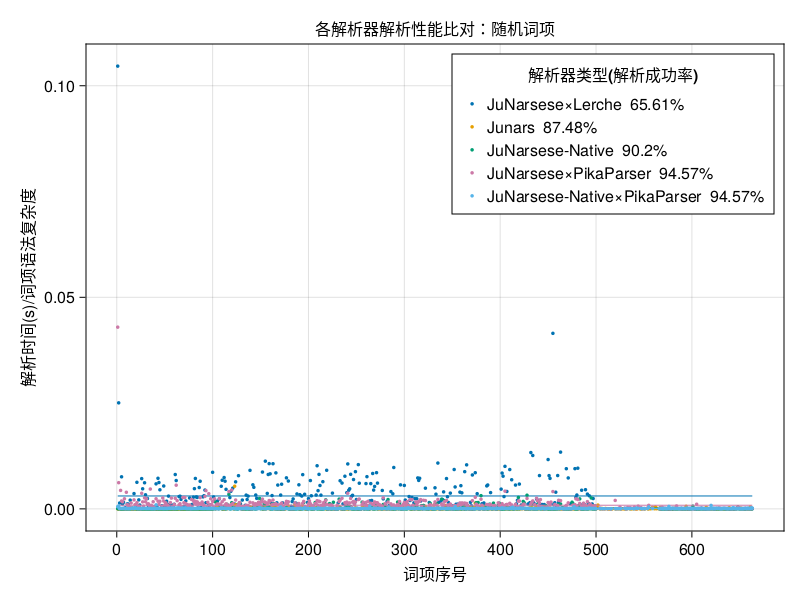

In [22]:
# ‰ΩøÁî®CairoMakieÊâìÂç∞ÂÖ∂‰∏≠ÁöÑ„ÄåËß£ÊûêÊó∂Èó¥Á∫ø„Äç
fig = Figure()
ax = Axis(fig[1, 1])
for (parser, result) in results
    N = length(result.time)
    # ËÆ°ÁÆóÁªìÊûú
    data = DataFrame(
        x = 1:N,
        y = result.time ./ result.complexity
    )
    # ËøáÊª§
    filter!(
        :y => y -> !ismissing(y) && !isnothing(y) && !isnan(y) && isfinite(y),
        data,
    )
    success_count = count((!ismissing).(result.time))
    complete_pct = string(round(success_count/N*100, digits=2), "%")
    # Êï£ÁÇπ
    sl = scatter!(
        ax, data.x, data.y;
        label = "$(parser_names[parser])\t$complete_pct",
        # color = :black,
        markersize = 5,
    )
    # ÁªòÂà∂ÂùáÂÄº‰∏ÄÊù°Á∫ø
    mean_y = sum(data.y) / length(data.y)
    mean_ys = mean_y * ones(length(data.y))
    lines!(
        ax, data.x, mean_ys; 
        # color = :black, 
        linewidth = 1
    )
end

# ÂêéÊúüË°®Ê†º‰øÆÈ•∞
axislegend("Ëß£ÊûêÂô®Á±ªÂûã(Ëß£ÊûêÊàêÂäüÁéá)"; position=:rt)
ax.title = "ÂêÑËß£ÊûêÂô®Ëß£ÊûêÊÄßËÉΩÊØîÂØπÔºöÈöèÊú∫ËØçÈ°π"
ax.xlabel = "ËØçÈ°πÂ∫èÂè∑"
ax.ylabel = "Ëß£ÊûêÊó∂Èó¥(s)/ËØçÈ°πËØ≠Ê≥ïÂ§çÊùÇÂ∫¶"

current_figure()

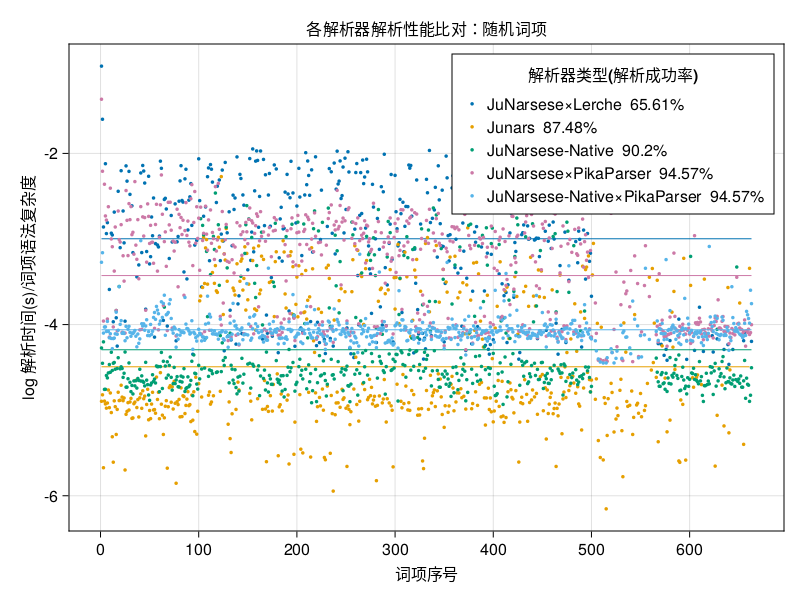

In [23]:
# ‰ΩøÁî®CairoMakieÊâìÂç∞ÂÖ∂‰∏≠ÁöÑ„ÄåËß£ÊûêÊó∂Èó¥Á∫ø„Äç
fig = Figure()
ax = Axis(fig[1, 1])
for (parser, result) in results
    # ËÆ°ÁÆóÁªìÊûú
    data = DataFrame(
        x = 1:length(result.time),
        y = log10.(result.time ./ result.complexity)
    )
    # ËøáÊª§
    filter!(
        :y => y -> !ismissing(y) && !isnothing(y) && !isnan(y) && isfinite(y),
        data,
    )
    xs, ys = data.x, data.y
    success_count = count((!ismissing).(result.time))
    complete_pct = string(round(success_count/N*100, digits=2), "%")
    # Êï£ÁÇπ
    sl = scatter!(
        ax, data.x, data.y;
        label = "$(parser_names[parser])\t$complete_pct",
        # color = :black,
        markersize = 5,
    )
    # ÁªòÂà∂ÂùáÂÄº‰∏ÄÊù°Á∫ø
    mean_ys = sum(ys) / length(ys)
    mean_ys = mean_ys * ones(length(ys))
    lines!(
        ax, xs, mean_ys; 
        # color = :black, 
        linewidth = 1
    )
end

# ÂêéÊúüË°®Ê†º‰øÆÈ•∞
axislegend("Ëß£ÊûêÂô®Á±ªÂûã(Ëß£ÊûêÊàêÂäüÁéá)"; position=:rt)
ax.title = "ÂêÑËß£ÊûêÂô®Ëß£ÊûêÊÄßËÉΩÊØîÂØπÔºöÈöèÊú∫ËØçÈ°π"
ax.xlabel = "ËØçÈ°πÂ∫èÂè∑"
ax.ylabel = "log Ëß£ÊûêÊó∂Èó¥(s)/ËØçÈ°πËØ≠Ê≥ïÂ§çÊùÇÂ∫¶"

current_figure()